In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
#Used headers/agent because the request was timed out and asking for an agent. 
#Using following code we can fake the agent.
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}
response = requests.get("https://www.zomato.com/jakarta/top-restaurants",headers=headers)

In [3]:
content = response.content
soup = BeautifulSoup(content,"html.parser")

In [4]:
top_rest = soup.find_all("div",attrs={"class": "bb0 collections-grid col-l-16"})
list_tr = top_rest[0].find_all("div",attrs={"class": "col-s-8 col-l-1by3"})

In [5]:
list_rest =[]
for tr in list_tr:
    dataframe ={}
    dataframe["rest_name"] = (tr.find("div",attrs={"class": "res_title zblack bold nowrap"})).text
    dataframe["rest_address"] = (tr.find("div",attrs={"class": "nowrap grey-text fontsize5 ttupper"})).text
    dataframe["cuisine_type"] = (tr.find("div",attrs={"class":"nowrap grey-text"})).text
    dataframe["rating"] = (tr.find("div",attrs={"class":"ads-res-snippet-rating-large"})).text
    list_rest.append(dataframe)
list_rest

[{'rest_name': '\n            Crowdeat Ayam Lemes\n          ',
  'rest_address': 'Tebet, Jakarta',
  'cuisine_type': '\n          Street Food, Indonesian\n        ',
  'rating': '\n              3.7\n            '},
 {'rest_name': '\n            Tien Chao - Gran Melia\n          ',
  'rest_address': 'Gran Melia Hotel, Kuningan, Jakarta',
  'cuisine_type': '\n          Chinese, Dimsum\n        ',
  'rating': '\n              3.6\n            '},
 {'rest_name': '\n            Cafe Gran Via - Gran Melia\n          ',
  'rest_address': 'Gran Melia Hotel, Kuningan, Jakarta',
  'cuisine_type': '\n          Asian, Indian, Western, Indonesian\n        ',
  'rating': '\n              4.1\n            '},
 {'rest_name': '\n            Tongseng Sate Kambing Pak Agus\n          ',
  'rest_address': 'Loksem Sunda Kelapa, Menteng, Jakarta',
  'cuisine_type': '\n          Indonesian\n        ',
  'rating': '\n              3.5\n            '},
 {'rest_name': '\n            Martabak Lab\n          ',

In [6]:
list_rest =[]
for tr in list_tr:
    dataframe ={}
    dataframe["rest_name"] = (tr.find("div",attrs={"class": "res_title zblack bold nowrap"})).text.replace('\n','').strip()
    dataframe["rest_address"] = (tr.find("div",attrs={"class": "nowrap grey-text fontsize5 ttupper"})).text.replace('\n', '').strip()
    dataframe["cuisine_type"] = (tr.find("div",attrs={"class":"nowrap grey-text"})).text.replace('\n', '').strip()
    dataframe["rating"] = (tr.find("div",attrs={"class":"ads-res-snippet-rating-large"})).text.replace('\n','').strip().replace('NEW','0.0')
    list_rest.append(dataframe)
list_rest

[{'rest_name': 'Crowdeat Ayam Lemes',
  'rest_address': 'Tebet, Jakarta',
  'cuisine_type': 'Street Food, Indonesian',
  'rating': '3.7'},
 {'rest_name': 'Tien Chao - Gran Melia',
  'rest_address': 'Gran Melia Hotel, Kuningan, Jakarta',
  'cuisine_type': 'Chinese, Dimsum',
  'rating': '3.6'},
 {'rest_name': 'Cafe Gran Via - Gran Melia',
  'rest_address': 'Gran Melia Hotel, Kuningan, Jakarta',
  'cuisine_type': 'Asian, Indian, Western, Indonesian',
  'rating': '4.1'},
 {'rest_name': 'Tongseng Sate Kambing Pak Agus',
  'rest_address': 'Loksem Sunda Kelapa, Menteng, Jakarta',
  'cuisine_type': 'Indonesian',
  'rating': '3.5'},
 {'rest_name': 'Martabak Lab',
  'rest_address': 'Tebet, Jakarta',
  'cuisine_type': 'Martabak',
  'rating': '3.7'},
 {'rest_name': 'Mie Ayam Acing',
  'rest_address': 'Grogol, Jakarta',
  'cuisine_type': 'Bakmi',
  'rating': '4.1'},
 {'rest_name': 'Yoshi Izakaya - Gran Melia',
  'rest_address': 'Gran Melia Hotel, Kuningan, Jakarta',
  'cuisine_type': 'Japanese, Sus

In [7]:
import pandas as pd
import numpy as np
df = pd.DataFrame(list_rest)
df.to_csv("zomato.csv",index=False)
df = pd.read_csv("zomato.csv")


In [8]:
df = df.assign(votes = [58,57,193,197,117,36,324,165,129,0,42,84,45,241,142,30,229,36,89,112,173,145,27,78,93,0,0,58,72,118])
df.head()

,cuisine_type,rating,rest_address,rest_name,votes
0,"Street Food, Indonesian",3.7,"Tebet, Jakarta",Crowdeat Ayam Lemes,58
1,"Chinese, Dimsum",3.6,"Gran Melia Hotel, Kuningan, Jakarta",Tien Chao - Gran Melia,57
2,"Asian, Indian, Western, Indonesian",4.1,"Gran Melia Hotel, Kuningan, Jakarta",Cafe Gran Via - Gran Melia,193
3,Indonesian,3.5,"Loksem Sunda Kelapa, Menteng, Jakarta",Tongseng Sate Kambing Pak Agus,197
4,Martabak,3.7,"Tebet, Jakarta",Martabak Lab,117


In [9]:
df.describe()


,rating,votes
count,30.000000,30.00000
mean,3.743333,103.00000
std,0.747725,79.06959
min,0.000000,0.00000
25%,3.700000,42.75000
50%,3.800000,86.50000
75%,4.000000,144.25000
max,4.500000,324.00000


In [10]:
df.nlargest(10,'rating')

,cuisine_type,rating,rest_address,rest_name,votes
27,"Indonesian, Asian",4.5,"Thamrin, Jakarta",Restoran Senyum Indonesia,58
14,"Ramen, Japanese",4.3,"Setiabudi One, Setiabudi, Jakarta",Bari-Uma Ramen,142
28,"Satay, Padang",4.2,"Senopati, Jakarta",Sate Padang Ajo Ramon,72
29,Asian,4.2,"Pondok Indah Plaza 2, Pondok indah, Jakarta",Hatchi,118
2,"Asian, Indian, Western, Indonesian",4.1,"Gran Melia Hotel, Kuningan, Jakarta",Cafe Gran Via - Gran Melia,193
5,Bakmi,4.1,"Grogol, Jakarta",Mie Ayam Acing,36
18,"Burger, American, Italian",4.1,"Central Park, Tanjung Duren, Jakarta",TGI Fridays,89
13,"Western, American, Asian",4.0,"Plaza Senayan Arcadia, Senayan, Jakarta",Prohibition Chophouse &...,241
20,Indonesian,4.0,"JAWARA Food Court, Kebon Jeruk, Jakarta",Nasi Cumi Hitam Madura Pak...,173
24,"Western, Italian, Indonesian",4.0,"Bogor Barat, Bogor",Bittersweet Resto,93


In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

AttributeError: 'AxesSubplot' object has no attribute 'spinnes'

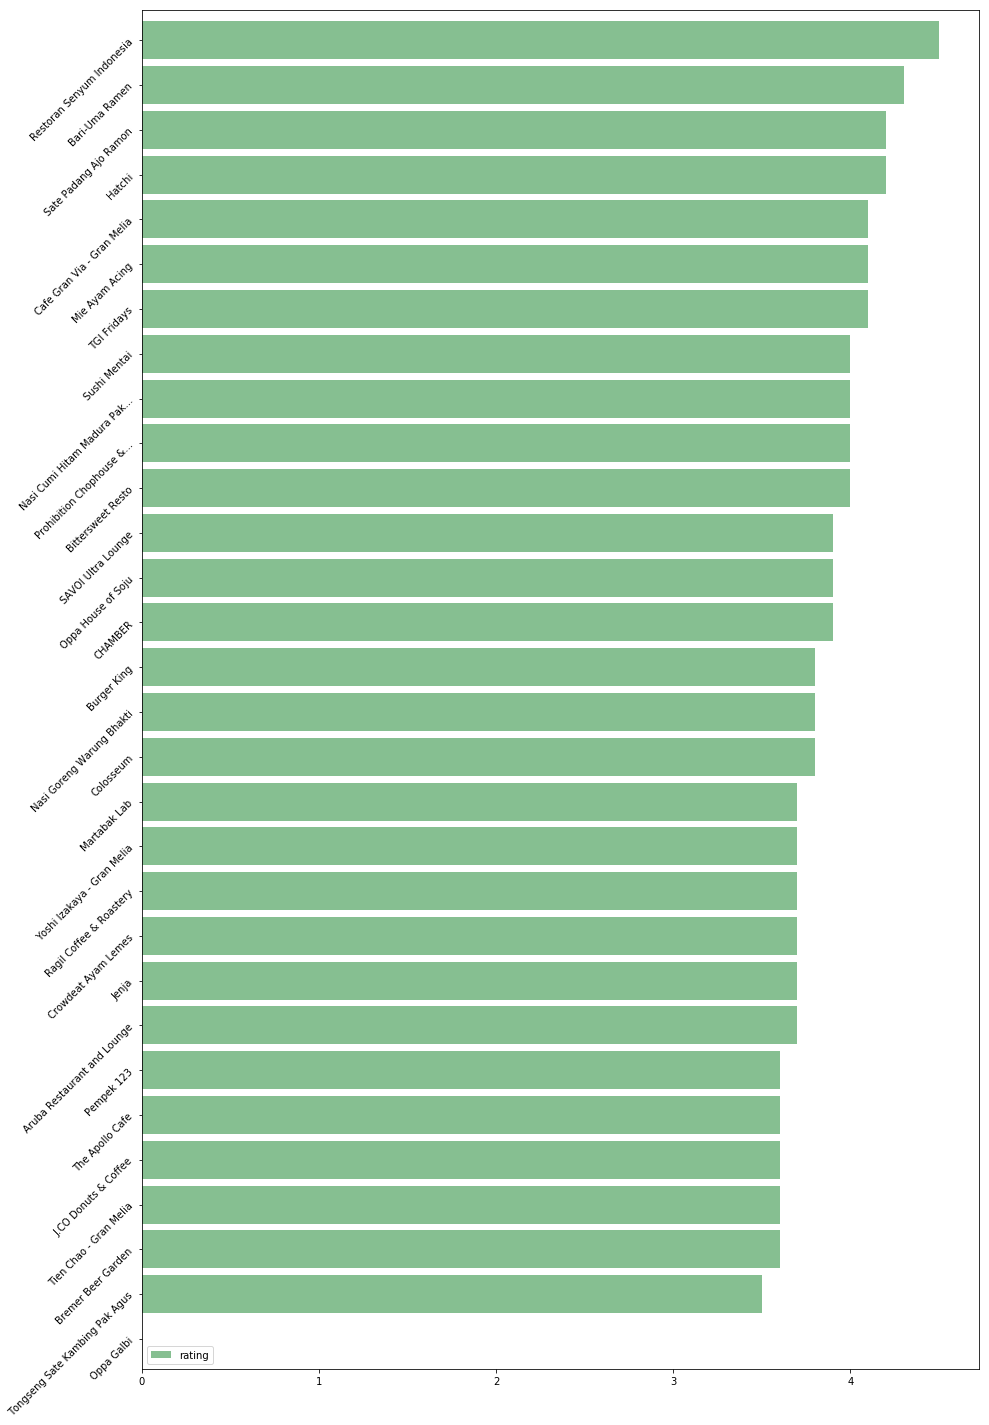

In [14]:
x = df[['rest_name', 'rating']]
x = x.sort_values('rating')
ax = x.plot(kind='barh', figsize=(15, 25), color='#86bf91', zorder=2, width=0.85)
ax.set_yticklabels(x['rest_name'])
for tick in ax.get_yticklabels():
    tick.set_rotation(45)
ax.spinnes['right'].set_visible(false)
ax.spinnes['top'].set_visible(false)
ax.spinnes['left'].set_visible(false)
ax.spinnes['buttom'].set_visible(false)

In [15]:
df.nlargest(10,'votes')

,cuisine_type,rating,rest_address,rest_name,votes
6,"Japanese, Sushi",3.7,"Gran Melia Hotel, Kuningan, Jakarta",Yoshi Izakaya - Gran Melia,324
13,"Western, American, Asian",4.0,"Plaza Senayan Arcadia, Senayan, Jakarta",Prohibition Chophouse &...,241
16,Drinks Only,3.8,"Kota, Jakarta",Colosseum,229
3,Indonesian,3.5,"Loksem Sunda Kelapa, Menteng, Jakarta",Tongseng Sate Kambing Pak Agus,197
2,"Asian, Indian, Western, Indonesian",4.1,"Gran Melia Hotel, Kuningan, Jakarta",Cafe Gran Via - Gran Melia,193
20,Indonesian,4.0,"JAWARA Food Court, Kebon Jeruk, Jakarta",Nasi Cumi Hitam Madura Pak...,173
7,Palembang,3.6,"Cempaka Putih, Jakarta",Pempek 123,165
21,Jawa,3.8,"Senopati, Jakarta",Nasi Goreng Warung Bhakti,145
14,"Ramen, Japanese",4.3,"Setiabudi One, Setiabudi, Jakarta",Bari-Uma Ramen,142
8,"Cafe, Coffee, Indonesian",3.7,"Senopati, Jakarta",Ragil Coffee & Roastery,129


AttributeError: 'AxesSubplot' object has no attribute 'spinnes'

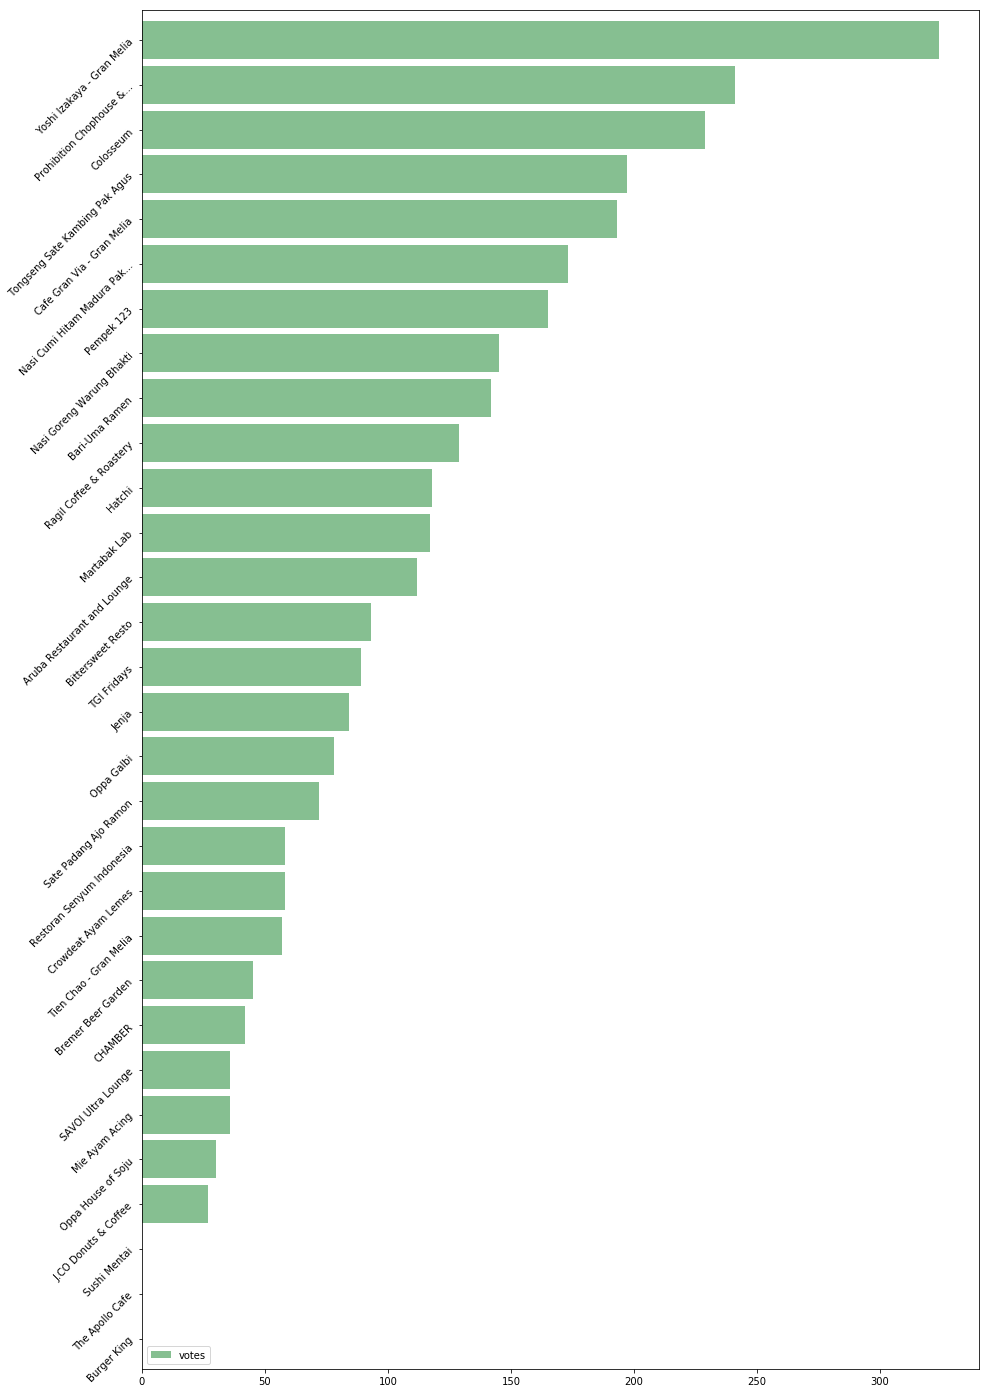

In [16]:
x = df[['rest_name', 'votes']]
x = x.sort_values('votes')
ax = x.plot(kind='barh', figsize=(15, 25), color='#86bf91', zorder=2, width=0.85)
ax.set_yticklabels(x['rest_name'])
for tick in ax.get_yticklabels():
    tick.set_rotation(45)
ax.spinnes['right'].set_visible(false)
ax.spinnes['top'].set_visible(false)
ax.spinnes['left'].set_visible(false)
ax.spinnes['buttom'].set_visible(false)

In [18]:
X = df[['votes']]
Y = df[['rating']]
lm = LinearRegression()
lm.fit(X,Y)

print('nilai koefisien determinasi: ', lm.score(X, Y))

nilai koefisien determinasi:  0.0018427118183350633


In [19]:
import seaborn as sns
%matplotlib inline 
from sklearn import linear_model
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train.count()+test.count()
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['votes']])
train_y = np.asanyarray(train[['rating']])
regr.fit (train_x, train_y)
# The coefficients
intercept=lm.intercept_
coefficients=lm.coef_
print("rating=",intercept,"+",coefficients,"votes")

rating= [3.70152161] + [[0.00040594]] votes


Text(0, 0.5, 'rating')

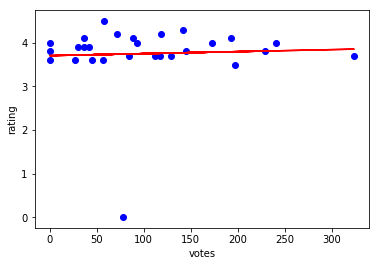

In [20]:
plt.scatter(train.votes, train.rating,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("votes")
plt.ylabel("rating")

In [21]:
import pandas as pd

contingency_table=pd.crosstab(df["rating"], df["votes"])
#print('contingency_table :-\n',contingency_table)

Observed_Values = contingency_table.values 
#print("Observed Values :-\n",Observed_Values)

import scipy.stats
b=scipy.stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
#print("Expected Values :-\n",Expected_Values)

#Degree of Freedom
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
#print("Degree of Freedom:-",df)

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
#print("chi-square statistic:-",chi_square_statistic)

#critical_value
alpha = 0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
#print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)

print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

if chi_square_statistic>=critical_value:
    print("H0 ditolak, artinya terdapat hubungan 2 variabel")
else:
    print("H0 diterima, artinya tidak terdapat hubungan 2 variabel")
    
if p_value<=alpha:
    print("H0 ditolak, artinya terdapat hubungan 2 variabel")
else:
    print("H0 diterima, artinya tidak terdapat hubungan 2 variabel")
# take a look at the dataset
#df.head()

p-value: 0.0017137749524662738
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 9.833333333333332
critical_value: 3.841458820694124
p-value: 0.0017137749524662738
H0 ditolak, artinya terdapat hubungan 2 variabel
H0 ditolak, artinya terdapat hubungan 2 variabel
